Predict how many medals the country is going to win in the next Olympic games. \
In this notebook I want to implement the functions for the linear regression and the cost function myself.

# Import libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

# Data prep
See notebook `02-libear-regression-sklearn.ipynb`.

In [3]:
data = pd.read_csv("data/teams.csv")
data.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [4]:
select_cols = ['team', 'year', 'athletes', 'age', 'medals', 'prev_medals']
data = data[select_cols]
data.head()

,team,year,athletes,age,medals,prev_medals
0,AFG,1964,8,22.0,0,0.0
1,AFG,1968,5,23.2,0,0.0
2,AFG,1972,8,29.0,0,0.0
3,AFG,1980,11,23.6,0,0.0
4,AFG,2004,5,18.6,0,0.0


In [7]:
# check how many null values
pd.isnull(data).sum()

team             0
year             0
athletes         0
age              0
medals           0
prev_medals    130
dtype: int64

In [8]:
# drop columns with NaNs
data = data.dropna()

# check that the command was correct
pd.isnull(data).sum()

team           0
year           0
athletes       0
age            0
medals         0
prev_medals    0
dtype: int64

# Split the dataset in train and test

In [9]:
train = data[data["year"] < 2012].copy()
test = data[data["year"] >= 2012].copy()

In [10]:
print("The number of training examples is: ", train.shape)
print("The number of testing examples is: ", test.shape)
print("Fraction of tesing exmamples: ", round(test.shape[0]/data.shape[0], 3))

The number of training examples is:  (1609, 6)
The number of testing examples is:  (405, 6)
Fraction of tesing exmamples:  0.201


In [12]:
train.head()

,team,year,athletes,age,medals,prev_medals
0,AFG,1964,8,22.0,0,0.0
1,AFG,1968,5,23.2,0,0.0
2,AFG,1972,8,29.0,0,0.0
3,AFG,1980,11,23.6,0,0.0
4,AFG,2004,5,18.6,0,0.0


In [13]:
x_train = train[['athletes', 'prev_medals']]
y_train = train[['medals']]

# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of x_train: <class 'pandas.core.frame.DataFrame'>
First five elements of x_train are:
    athletes  prev_medals
0         8          0.0
1         5          0.0
2         8          0.0
3        11          0.0
4         5          0.0
Type of y_train: <class 'pandas.core.frame.DataFrame'>
First five elements of y_train are:
    medals
0       0
1       0
2       0
3       0
4       0


In [14]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (1609, 2)
The shape of y_train is:  (1609, 1)
Number of training examples (m): 1609


# Compute cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation of Cost Function

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [17]:
x_train.shape[0]

1609

In [19]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
X_m = .to_numpy()
type(X_m), X_m.shape

(numpy.ndarray, (1609, 2))

In [33]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    m = X.shape[0]
    cost = 0.0

    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar   
     
    return cost

In [34]:
# choose initial guesses for b and w parameters
b_init = 0
w_init = np.ones(x_train.shape[1])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (2,), b_init type: <class 'int'>


In [35]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : [11428.72964574]


# Predict

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

In [38]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [39]:
# get a row from our training data
x_vec = x_train.to_numpy()[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (2,), x_vec value: [8. 0.]
f_wb shape (), prediction: 8.0


# Compute cost

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [40]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()
        
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [42]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : [11428.72964574]


In [43]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()
        
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [44]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [78.08328154]
dj_dw at initial w,b: 
 [23132.7992542   4218.19763828]


/var/folders/8v/xpvjr2rd5h37bdb655bsyz1r0000gp/T/ipykernel_7451/2030842061.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


In [62]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        #if i% math.ceil(num_iters / 10) == 0:
        #    print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [63]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

/var/folders/8v/xpvjr2rd5h37bdb655bsyz1r0000gp/T/ipykernel_7451/2030842061.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err * X[i, j]


TypeError: unsupported format string passed to numpy.ndarray.__format__

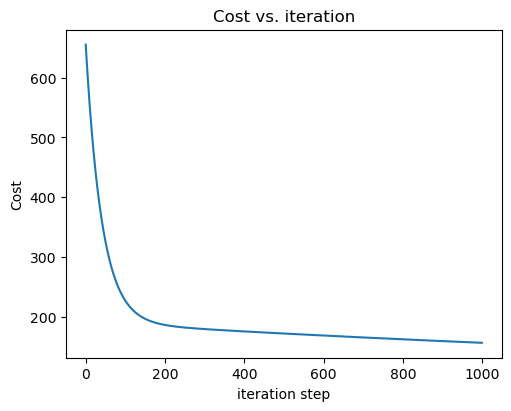

In [64]:
# plot cost versus iteration  
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
plt.show()